# Name: Prithvi Shetty

## Problem Set 3, due Wednesday, May 3rd, 5:30pm.

## Introduction to the assignment

For this assignment, you will be using data from the [Progresa
program](http://en.wikipedia.org/wiki/Oportunidades), a government
social assistance program in Mexico. This program, as well as the
details of its impact, are described in the paper "[School subsidies
for the poor: evaluating the Mexican Progresa poverty
program](http://www.sciencedirect.com/science/article/pii/S0304387803001858)",
by Paul Shultz (available on Canvas).  The data
(progresa_sample.csv.gz) is available on canvas
in files/data.

Please read the paper to familiarize yourself with
the PROGRESA program before beginning this problem set, so you have a
rough sense of where the data come from and how they were
generated. If you just proceed into the problem set without
understanding Progresa or the data, it will be very difficult!

The goal of this problem set is to implement some of the basic
econometric techniques that you are learning in class to measure the
impact of Progresa on secondary school enrollment rates, in particular
differences-in-differences.  Your task is to **estimate the impact of
_progresa_ subsidies on the school attendance**.  Note: this asks to
estimate a causal effect.

The timeline of the program was:

 * Baseline survey conducted in 1997
 * Intervention begins in 1998, "Wave 1" of data collected in 1998
 * "Wave 2 of data" collected in 1999
 * Evaluation ends in 2000, at which point the control villages were treated. 
 
When you are ready, download the progresa_sample.csv data from
Canvas. The data are actual data collected to evaluate the impact of
the Progresa program.  In this file, each row corresponds to an
observation taken for a given child for a given year. There are two
years of data (1997 and 1998), and just under 40,000 children who are
surveyed in both years.  For each child-year observation, the
following variables are collected:

| Variable name | Description|
|------|------|
|year	  |year in which data is collected
|sex	  |male = 1|
|indig	  |indigenous = 1|
|dist_sec |nearest distance to a secondary school|
|sc	      |enrolled in school in year of survey (=1)|
|grc      |grade enrolled|
|fam_n    |family size|
|min_dist |	min distance to an urban center|
|dist_cap |	min distance to the capital|
|poor     |	poor = "pobre", not poor = "no pobre"|
|progresa |treatment = "basal", control = "0"|
|hohedu	  |years of schooling of head of household|
|hohwag	  |monthly wages of head of household|
|welfare_index|	welfare index used to classify poor|
|hohsex	|gender of head of household (male=1)|
|hohage	|age of head of household|
|age	|years old|
|folnum	|individual id|
|village|	village id|
|sc97	|enrolled in school in 1997 (=1) |

## Part 1: Descriptive analysis

### 1.1	Summary Statistics

Report summary statistics (mean, standard deviation, and number of missings) for all of
the demographic variables in the dataset (i.e., everything except
year, folnum, village).  Present the actual levels for 'progresa' and
'poor'.  Do these fit with the documentation above?

Present these in a single table alphabetized
by variable name. Do NOT simply expect the grader to scroll through
your output!

In [610]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [611]:
p=pd.read_csv('progresa_sample.csv.gz')
p.head()

,year,sex,indig,dist_sec,sc,grc,fam_n,min_dist,dist_cap,poor,...,hohedu,hohwag,welfare_index,hohsex,hohage,age,village,folnum,grc97,sc97
0,97,0.0,0.0,4.473,1.0,7.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,13,163,1,7,1.0
1,98,0.0,0.0,4.473,1.0,8.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,14,163,1,7,1.0
2,97,1.0,0.0,4.473,1.0,6.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,12,163,2,6,1.0
3,98,1.0,0.0,4.473,1.0,7.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,13,163,2,6,1.0
4,97,0.0,0.0,4.473,1.0,2.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,8,163,3,2,1.0


In [612]:
p.dtypes
p.isnull().sum()
#The number of missing records are 19,438

year               int64
sex              float64
indig            float64
dist_sec         float64
sc               float64
grc              float64
fam_n              int64
min_dist         float64
dist_cap         float64
poor              object
progresa          object
hohedu             int64
hohwag           float64
welfare_index    float64
hohsex           float64
hohage           float64
age                int64
village            int64
folnum             int64
grc97              int64
sc97             float64
dtype: object

year                0
sex                24
indig             300
dist_sec            0
sc               8453
grc              6549
fam_n               0
min_dist            0
dist_cap            0
poor                0
progresa            0
hohedu              0
hohwag              0
welfare_index     210
hohsex             20
hohage             10
age                 0
village             0
folnum              0
grc97               0
sc97             3872
dtype: int64

In [613]:
p.dropna(axis=0,inplace=False,how='any').shape

(67122, 21)

In [614]:
p.shape

(77250, 21)

In [615]:
p.drop(['year','village','folnum'],axis=1).describe().transpose()
#Descriptive statistics

,count,mean,std,min,25%,50%,75%,max
sex,77226.0,0.512211,0.499854,0.000000,0.000000,1.000000,1.000000,1.000000
indig,76950.0,0.298324,0.457525,0.000000,0.000000,0.000000,1.000000,1.000000
dist_sec,77250.0,2.418910,2.234109,0.000000,0.574000,2.279000,3.582000,14.879000
sc,68797.0,0.819818,0.384342,0.000000,1.000000,1.000000,1.000000,1.000000
grc,70701.0,3.963537,2.499063,0.000000,2.000000,4.000000,6.000000,14.000000
fam_n,77250.0,7.215715,2.352900,1.000000,6.000000,7.000000,9.000000,24.000000
min_dist,77250.0,103.447520,42.089441,9.465392,70.518238,111.228612,138.446009,170.457647
dist_cap,77250.0,147.674452,76.063134,9.465392,92.327050,132.001494,184.445225,359.774457
hohedu,77250.0,2.768104,2.656106,0.000000,0.000000,2.000000,4.000000,20.000000
hohwag,77250.0,586.985312,788.133664,0.000000,120.000000,500.000000,750.000000,14000.000000


In [616]:
p['progresa'].describe()
p['poor'].describe()

count     77250
unique        2
top       basal
freq      47560
Name: progresa, dtype: object

count     77250
unique        2
top       pobre
freq      65392
Name: poor, dtype: object

In [617]:
#There are 47560  families who were given money
#65392 families out of 77250 were poor

### 1.2 Differences at baseline?
Now let's investigate the differences in baseline.  Are the baseline (1997) demographic characteristics **for the poor**
different in treatment and control villages?

I suggest you to use a T-Test to
determine whether there is a statistically significant difference in
the average values of each of the variables in the dataset. Focus only
on the data from 1997 for poor.

Present your results in a single table with the following columns and 14 (or so) rows:

| Variable name | Average value (Treatment villages) | Average value (Control villages) | Difference (Treat - Control) | p-value |
|------|------|------|------|------|
|Male|?|?|?|?|


In [618]:
p.dropna(axis=0,inplace=True,how='any')
p.shape

(67122, 21)

In [619]:
p.head(1)
p97=p[(p.year==97) & (p.poor=='pobre')]
p97.shape
p97.head(10)
#Dataset consisting only of the poor families from the year 1997

,year,sex,indig,dist_sec,sc,grc,fam_n,min_dist,dist_cap,poor,...,hohedu,hohwag,welfare_index,hohsex,hohage,age,village,folnum,grc97,sc97
0,97,0.0,0.0,4.473,1.0,7.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,13,163,1,7,1.0


(30738, 21)

,year,sex,indig,dist_sec,sc,grc,fam_n,min_dist,dist_cap,poor,...,hohedu,hohwag,welfare_index,hohsex,hohage,age,village,folnum,grc97,sc97
0,97,0.0,0.0,4.473,1.0,7.0,7,21.168384,21.168384,pobre,...,6,0.0,583.00000,1.0,35.0,13,163,1,7,1.0
2,97,1.0,0.0,4.473,1.0,6.0,7,21.168384,21.168384,pobre,...,6,0.0,583.00000,1.0,35.0,12,163,2,6,1.0
4,97,0.0,0.0,4.473,1.0,2.0,7,21.168384,21.168384,pobre,...,6,0.0,583.00000,1.0,35.0,8,163,3,2,1.0
6,97,0.0,0.0,3.154,0.0,6.0,6,127.114780,154.196003,pobre,...,4,0.0,684.00000,1.0,85.0,14,271,4,6,0.0
8,97,1.0,0.0,3.373,1.0,2.0,5,85.300272,105.878669,pobre,...,6,875.0,742.14001,1.0,26.0,9,263,5,2,1.0
10,97,0.0,0.0,3.373,1.0,2.0,5,85.300272,105.878669,pobre,...,6,875.0,742.14001,1.0,26.0,7,263,6,2,1.0
14,97,1.0,1.0,1.935,1.0,2.0,5,127.657608,333.048731,pobre,...,3,500.0,552.00000,1.0,98.0,10,418,8,2,1.0
16,97,0.0,1.0,1.935,1.0,2.0,5,127.657608,333.048731,pobre,...,3,500.0,552.00000,1.0,98.0,8,418,9,2,1.0
18,97,1.0,1.0,1.935,1.0,5.0,10,127.657608,333.048731,pobre,...,0,500.0,660.00000,1.0,60.0,16,418,10,5,1.0
20,97,0.0,1.0,1.935,1.0,3.0,10,127.657608,333.048731,pobre,...,0,500.0,660.00000,1.0,60.0,12,418,11,3,1.0


In [620]:
p97['Gender']=p97.sex.map({0:'Female',1:'Male'})
p97.head(2)

C:\Users\Prathik\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,year,sex,indig,dist_sec,sc,grc,fam_n,min_dist,dist_cap,poor,...,hohwag,welfare_index,hohsex,hohage,age,village,folnum,grc97,sc97,Gender
0,97,0.0,0.0,4.473,1.0,7.0,7,21.168384,21.168384,pobre,...,0.0,583.0,1.0,35.0,13,163,1,7,1.0,Female
2,97,1.0,0.0,4.473,1.0,6.0,7,21.168384,21.168384,pobre,...,0.0,583.0,1.0,35.0,12,163,2,6,1.0,Male


In [621]:
pd.set_option('display.max_rows',140)

In [622]:
mean=p97.drop(['year','poor'],axis=1).groupby('progresa').mean().transpose().reset_index()
mean.head()

progresa,index,0,basal
0,sex,0.506556,0.520268
1,indig,0.325306,0.316744
2,dist_sec,2.400687,2.399648
3,sc,0.815066,0.822697
4,grc,3.733653,3.709214


In [623]:
p97.groupby(['progresa','sex']).sc97.mean()

progresa  sex
0         0.0    0.798020
          1.0    0.831670
basal     0.0    0.807171
          1.0    0.837012
Name: sc97, dtype: float64

In [624]:
from collections import OrderedDict


In [663]:
new=pd.DataFrame(OrderedDict({'Variable Name': mean['index'],'Average value (Treatment villages)':mean.basal,'Average value(Control villages)':mean['0']}))

In [664]:
new = new.append({'Variable Name': 'Male','Average value (Treatment villages)':0.837012,'Average value(Control villages)':0.831670},ignore_index=True)
new = new.append({'Variable Name': 'Female','Average value (Treatment villages)':0.807171,'Average value(Control villages)':0.798020},ignore_index=True)

In [661]:
p97c=p97[p97.progresa=='0']
p97t=p97[p97.progresa=='basal']

In [628]:
from scipy.stats import ttest_ind

In [629]:
female=ttest_ind(p97c[p97.sex==0.0].sc97,p97t[p97.sex==0.0].sc97)
female
#Statistically insignificant as p-value is too high for Females

C:\Users\Prathik\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Ttest_indResult(statistic=-1.369354955884203, pvalue=0.17090898028121904)

In [630]:
male=ttest_ind(p97c[p97.sex==1.0].sc97,p97t[p97.sex==1.0].sc97)
male
#Statistically insignificant as p-value is too high for Males

C:\Users\Prathik\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Ttest_indResult(statistic=-0.8760158214981657, pvalue=0.3810347250637104)

In [631]:
ttest=[]
for i in (1,2,3,4,5,6,7,8,11,12,13,14,15,16,17,18,19,20):
        x=ttest_ind(p97c.iloc[:,i].values,p97t.iloc[:,i].values)
        ttest.append(x[1])
ttest

[0.01956962017174901,
 0.11837601031859153,
 0.967094920108127,
 0.09117958597336943,
 0.39477501418400196,
 0.4236087919095054,
 1.936660975824195e-18,
 0.0034141936360538474,
 0.026132392868595904,
 0.00027276608533743804,
 0.00037240425899663014,
 0.47812322422242826,
 1.925766966551876e-06,
 0.24761554848946915,
 8.322183387534834e-196,
 0.3621745038840205,
 0.39477501418400196,
 0.09117958597336943]

In [632]:
ttest.append(male[1])

In [633]:
ttest.append(female[1])

In [665]:
new['Difference']=new['Average value (Treatment villages)']-new['Average value(Control villages)']
new['P value']=ttest

### Final results

In [666]:
new

#Final results

,Variable Name,Average value (Treatment villages),Average value(Control villages),Difference,P value
0,sex,0.520268,0.506556,0.013713,1.956962e-02
1,indig,0.316744,0.325306,-0.008562,1.183760e-01
2,dist_sec,2.399648,2.400687,-0.001039,9.670949e-01
3,sc,0.822697,0.815066,0.007631,9.117959e-02
4,grc,3.709214,3.733653,-0.024439,3.947750e-01
5,fam_n,7.281032,7.302939,-0.021907,4.236088e-01
6,min_dist,107.395231,103.098348,4.296884,1.936661e-18
7,dist_cap,151.801472,154.492095,-2.690622,3.414194e-03
8,hohedu,2.726729,2.660982,0.065747,2.613239e-02
9,hohwag,550.207086,580.694452,-30.487366,2.727661e-04


### 1.3 Interpretation

* A: Are there statistically significant differences between treatment and control villages as baseline? 
* B: Why does it matter if there are differences at baseline?
* C: What does this imply about how to measure the impact of the treatment?

A)
Assuming 95% confidence interval,
Yes, there are statistically significant differences between treatment and control villages as baseline in variables such as dist_cap,hohedu,hohwag,welfare_index,min_dist, Age. But rest of the results are not statistically significant as they are greater than 0.05

B)If there are low differences at baseline, it indicates that the p-value is also correspondingly low and hence, the control and treatment baseline are similar.
If the baseline is not similar, it means that the impact of the treatment will be skewed from the beginning.

C)Thus, the p-value must be as low as possible for statistically significant results. Lower the t-statistic, the higher the chances of null hypothesis getting accepted.

### 1.4 Graphical exploration, part 1

For each level of household head education, compute the average
enrollment rate in 1997. Create a scatterplot that shows this
relationship. What do you notice?

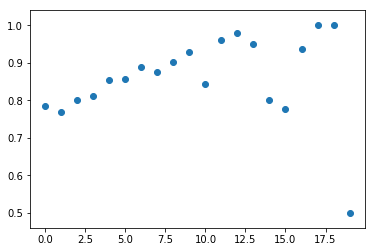

In [636]:
plt.scatter(range(0,20),p97.groupby('hohedu').mean().sc97)

It is observed that as the average enrollment rate is increasing as the level of household education is increasing in the year of 1997.

### 1.5 Graphical exploration, part 2

Create a histogram of village enrollment rates **among poor households
in treated villages**, before and after treatment.  Specifically, for
each village, calculate the average rate of enrollment of poor
households in treated villages in 1997, then compute the average rate
of enrollment of poor households in treated villages in 1998. Create
two separate histograms showing the distribution of these average
enrollments rates, one histogram for 1997 and one histogram for
1998. On each histogram, draw a vertical line that intersects the
x-axis at the average value (across all households). Does there appear
to be a difference? Is this difference statistically significant?

(array([  7.,   9.,  23.,  47.,  61.,  79., 115.,  79.,  58.,  24.]),
 array([0.53333333, 0.58      , 0.62666667, 0.67333333, 0.72      ,
        0.76666667, 0.81333333, 0.86      , 0.90666667, 0.95333333,
        1.        ]),
 <a list of 10 Patch objects>)

The value of mean is :  0.8137260401457224


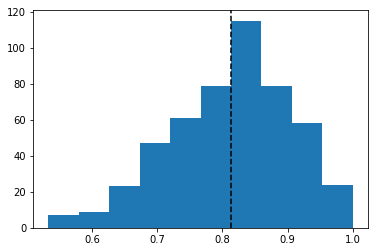

In [637]:
plt.hist(p97.groupby('village').mean().sc97)
plt.axvline(p97.groupby('village').mean().sc97.mean(),color='black',linestyle='dashed')
print("The value of mean is : ", p97.groupby('village').mean().sc97.mean())
plt.show()

In [638]:
p98=p[(p.year==98) & (p.poor=='pobre')]

(array([  2.,   2.,   1.,  20.,  32.,  63.,  98., 117., 116.,  51.]),
 array([0.4 , 0.46, 0.52, 0.58, 0.64, 0.7 , 0.76, 0.82, 0.88, 0.94, 1.  ]),
 <a list of 10 Patch objects>)

The value of mean is :  0.8245851498600227


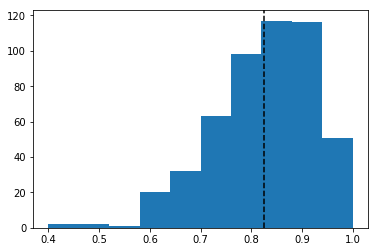

In [639]:
plt.hist(p98.groupby('village').mean().sc)
plt.axvline(p98.groupby('village').mean().sc.mean(),color='black',linestyle='dashed')
print("The value of mean is : ", p98.groupby('village').mean().sc.mean())

In [640]:
ttest_ind(p97.groupby('village').mean().sc97,p98.groupby('village').mean().sc)

Ttest_indResult(statistic=-1.773182365284186, pvalue=0.07650221623804736)

The average enrollment rate increased from 0.8137 to 0.8245 from the year 1997 to the year 1998.

Considering a 95% confidence interval, we can say that as the p value is greater than 0.05, the result is statistically insignificant and the null hypothesis is accepted.

## Part 2: Measuring Impact

Our goal is to estimate the causal impact of the PROGRESA program on
the social and economic outcomes of individuals in Mexico. We will
focus on the impact of the program on the poor (those with
poor=='pobre'), since only the poor were eligible to receive the
PROGRESA assistance.

### 2.1 Cross-Sectional Estimator: T-test

Begin by estimating the impact of Progresa using "simple differences."
Restricting yourself to data from 1998 (after treatment), calculate
the average enrollment rate among **poor** households in the Treatment
villages and the average enrollment rate among **poor** households in
the control villages. Use a t-test to determine if this difference is
statistically significant. What do you conclude?

In [641]:
p98c=p98[p98.progresa=='0']
p98t=p98[p98.progresa=='basal']

In [642]:
cross1=p98c.sc.mean()
cross1

0.810923092511906

In [643]:
cross2=p98t.sc.mean()
cross2

0.849257030578411

In [644]:
cross2-cross1

0.03833393806650498

In [645]:
ttest_ind(p98c.sc,p98t.sc)

Ttest_indResult(statistic=-8.101650305300375, pvalue=5.656455605358843e-16)

The result is statistically significant as P-value is very less than the alpha value(0.05) assuming 95% confidence interval.


### 2.2 Cross-Sectional Estimator: Regression

Estimate the effects of Progresa on enrollment using a regression
model, by regressing the 1998 enrollment rates **of the poor** on
treatment assignment.  Do not include any additional control
variables.
Discuss the following:

* Based on this model, how much did Progresa increase the likelihood of a child enrolling?
* How does your regression estimate compare to your t-test estimate from part 2.1?
* Based on this regression model, can we reject the null hypothesis that the treatment effects are zero? 
* What is the counterfactual assumption underlying this regression?

Note: I recommend to use statsmodels.formula.api as this allows to use
convenient R-style formulas and provedes nice summaries of the results.

In [646]:
import statsmodels.formula.api as smf
import random

In [647]:
x = p98.progresa
y = p98.sc

In [648]:
df = pd.DataFrame({"y" : y, "x" : x })

In [649]:
df['x']=df['x'].map({'basal':1,'0':0})
df

,x,y
1,0,1.0
3,0,1.0
5,0,1.0
7,1,0.0
9,1,1.0
11,1,1.0
15,1,1.0
17,1,1.0
19,1,0.0
21,1,1.0


In [650]:
m = smf.ols(formula = "y~x", data=df).fit()

In [651]:
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     65.64
Date:                Wed, 02 May 2018   Prob (F-statistic):           5.66e-16
Time:                        15:44:22   Log-Likelihood:                -11171.
No. Observations:               26155   AIC:                         2.235e+04
Df Residuals:                   26153   BIC:                         2.236e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8109      0.004    217.190      0.000       0.804       0.818
x              0.0383      0.005      8.102      0.000       0.029       0.048
==============================================================================
Omnibus:                     7487.800   Durbin-Watson:                   1.734
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15756.374
Skew:                          -1.796   Prob(JB):                         0.00
Kurtosis:                       4.245   Cond. No.                         3.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The likelihood chances of the enrollment of the child improved by 0.0383 times.

The regression estimate is improved bas the value of t-statistic has increase further.

Yes, the statistical results are quite significant as the the p-value is lower than the alpha value assuming 95% confidence interval. Thus, we can reject the null hypothesis.

The counterfactual assumption is : The enrollment rates increased due to the other factors other than the Progresa treatment over time.

### 2.3 Multiple Regression

Re-run the above regression estimated but this time include a set of
relevant control variables. Include, for instance, age, distance to a secondary
school, gender, education of household head, welfare index,
indigenous, etc.

* How do the controls affect the point estimate of treatment effect?
* How do the controls affect the standard error on the treatment effect? 
* How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?

In [652]:
p98['nprogresa']=p98['progresa'].map({'basal':1,'0':0})

C:\Users\Prathik\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [653]:
smf.ols(formula = "sc~nprogresa+sex", data=p98).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     46.98
Date:                Wed, 02 May 2018   Prob (F-statistic):           4.31e-21
Time:                        15:44:31   Log-Likelihood:                -11157.
No. Observations:               26155   AIC:                         2.232e+04
Df Residuals:                   26152   BIC:                         2.235e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7985      0.004    181.411      0.000       0.790       0.807
nprogresa      0.0381      0.005      8.046      0.000       0.029       0.047
sex            0.0244      0.005      5.315      0.000       0.015       0.033
==============================================================================
Omnibus:                     7472.984   Durbin-Watson:                   1.733
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15704.399
Skew:                          -1.793   Prob(JB):                         0.00
Kurtosis:                       4.243   Cond. No.                         3.57
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [654]:
smf.ols(formula = "sc~nprogresa*hohedu*sex*village", data=p98).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     30.56
Date:                Wed, 02 May 2018   Prob (F-statistic):           2.35e-87
Time:                        15:44:35   Log-Likelihood:                -10977.
No. Observations:               26155   AIC:                         2.199e+04
Df Residuals:                   26139   BIC:                         2.212e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        0.7594      0.017     45.042      0.000       0.726       0.792
nprogresa                        0.0256      0.020      1.265      0.206      -0.014       0.065
hohedu                           0.0132      0.005      2.687      0.007       0.004       0.023
nprogresa:hohedu                 0.0014      0.006      0.246      0.806      -0.010       0.013
sex                             -0.0306      0.024     -1.297      0.195      -0.077       0.016
nprogresa:sex                    0.0727      0.028      2.583      0.010       0.018       0.128
hohedu:sex                       0.0073      0.007      1.084      0.278      -0.006       0.021
nprogresa:hohedu:sex            -0.0114      0.008     -1.436      0.151      -0.027       0.004
village                      -3.942e-05   5.28e-05     -0.747      0.455      -0.000     6.4e-05
nprogresa:village             7.953e-05   6.67e-05      1.192      0.233   -5.13e-05       0.000
hohedu:village                1.426e-05   1.49e-05      0.958      0.338   -1.49e-05    4.34e-05
nprogresa:hohedu:village      -1.09e-05   1.82e-05     -0.600      0.549   -4.65e-05    2.47e-05
sex:village                      0.0002   7.38e-05      2.902      0.004    6.95e-05       0.000
nprogresa:sex:village           -0.0003    9.3e-05     -3.303      0.001      -0.000      -0.000
hohedu:sex:village           -2.652e-05   2.05e-05     -1.292      0.196   -6.67e-05    1.37e-05
nprogresa:hohedu:sex:village   4.64e-05   2.52e-05      1.844      0.065   -2.93e-06    9.57e-05
==============================================================================
Omnibus:                     7250.878   Durbin-Watson:                   1.745
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14934.599
Skew:                          -1.753   Prob(JB):                         0.00
Kurtosis:                       4.190   Cond. No.                     2.94e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [549]:
smf.ols(formula = "sc~nprogresa*hohedu*sex*village*indig", data=p98).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     17.83
Date:                Wed, 02 May 2018   Prob (F-statistic):           1.04e-95
Time:                        00:59:24   Log-Likelihood:                -10930.
No. Observations:               26155   AIC:                         2.192e+04
Df Residuals:                   26123   BIC:                         2.219e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              0.7510      0.022     33.588      0.000       0.707       0.795
nprogresa                              0.0217      0.026      0.825      0.409      -0.030       0.073
hohedu                                 0.0156      0.006      2.527      0.012       0.003       0.028
nprogresa:hohedu                       0.0008      0.007      0.111      0.912      -0.013       0.015
sex                                   -0.0189      0.031     -0.611      0.541      -0.079       0.042
nprogresa:sex                          0.0692      0.036      1.898      0.058      -0.002       0.141
hohedu:sex                             0.0061      0.008      0.730      0.465      -0.010       0.022
nprogresa:hohedu:sex                  -0.0117      0.010     -1.177      0.239      -0.031       0.008
village                            -5.307e-05    7.4e-05     -0.717      0.473      -0.000    9.19e-05
nprogresa:village                      0.0001   9.25e-05      1.507      0.132   -4.19e-05       0.000
hohedu:village                       8.17e-06   1.99e-05      0.411      0.681   -3.08e-05    4.71e-05
nprogresa:hohedu:village           -2.049e-05   2.48e-05     -0.826      0.409   -6.91e-05    2.81e-05
sex:village                            0.0001      0.000      1.173      0.241   -8.08e-05       0.000
nprogresa:sex:village                 -0.0003      0.000     -2.498      0.012      -0.001   -6.91e-05
hohedu:sex:village                 -1.722e-05   2.72e-05     -0.634      0.526   -7.05e-05    3.61e-05
nprogresa:hohedu:sex:village        5.445e-05   3.43e-05      1.588      0.112   -1.28e-05       0.000
indig                                  0.0344      0.035      0.992      0.321      -0.034       0.102
nprogresa:indig                        0.0019      0.042      0.045      0.964      -0.081       0.084
hohedu:indig                          -0.0024      0.011     -0.222      0.825      -0.024       0.019
nprogresa:hohedu:indig                 0.0019      0.013      0.151      0.880      -0.023       0.027
sex:indig                             -0.0006      0.049     -0.012      0.990      -0.097       0.096
nprogresa:sex:indig                   -0.0025      0.059     -0.043      0.965      -0.118       0.113
hohedu:sex:indig                    -1.89e-05      0.015     -0.001      0.999      -0.030       0.030
nprogresa:hohedu:sex:indig             0.0015      0.018      0.086      0.931      -0.033       0.036
village:indig                       2.218e-06      0.000      0.021      0.983      -0.000       0.000
nprogresa:village:indig               -0.0001      0.000     -0.842      0.400      -0.000       0.000
hohedu:village:indig                5.796e-06   3.13e-05      0.185      0.853   -5.55e-05    6.

As the control variables are added, the R squared value keeps on increasing indicating a better fit. However, the intercept value decreases as well with an increase in control variables.

However, with the increase of variables, the standard error also increase simultaneously.

The estimate for Progresa variable is the almost the same in sections 2.2 and 2.3 which is 0.0383.
On Comparing with 2.2, we can say that as control variables are added, the p value does increase. But overall, it does not reach close to the value of alpha. Hence, the results are statistically significant. 
Also, as more control variables are added, the estimate for progresa decreases.

### 2.4 Difference-in-Difference, version 1 (tabular)

Thus far, we have computed the effects of Progresa by estimating the
difference in 1998 enrollment rates across villages. An alternative
approach would be to compute the treatment effect using a
difference-in-differences framework.

Begin by estimating the average treatment effects of the program for poor households using data from 1997 and 1998. Specifically, calculate:

a) the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages

b) the difference (between 1997 and 1998) in enrollment rates among poor households in control villages.

c) The difference between these two differences is your estimate.

* What is your estimate of the impact, and how does it compare to your earlier (simple difference) results?

* What is the counterfactual assumption underlying this estimate? 


In [655]:
p97.groupby('progresa').sc97.mean()
p98.groupby('progresa').sc.mean()

progresa
0        0.815066
basal    0.822697
Name: sc97, dtype: float64

progresa
0        0.810923
basal    0.849257
Name: sc, dtype: float64

In [656]:
diffcontrol=(0.810923-0.815066)
diffcontrol

-0.004143000000000008

In [657]:
difftreated=(0.849257-0.822697)
difftreated

0.026560000000000028

In [658]:
diffindiff=difftreated-diffcontrol
diffindiff

0.030703000000000036

The diff-in-diff is 0.0307 which is relatively lesser but pretty close to 0.0383(simple difference).

From the diff-in-diff score, we can say that there is a significant impact on the treatment group as the difference is positive.

The counterfactual assumption : The mean change in control group represents the counterfactual change in treatment grop if there were no treatment.

### 2.5 Difference-in-Difference, version 2 (regression)

Now use a regression specification to estimate the average treatment
effects of the program in a difference-in-differences
framework. Include at least 5 control variables.

* What is your estimate of the impact of Progresa? Be very specific in
  interpreting your coefficients and standard errors, and make sure to
  specify exactly what units you are measuring and estimating.

* How do these estimates of the treatment effect compare to the
  estimates based on the simple difference?

* How do these estimates compare to the difference-in-difference
  estimates from 2.4 above? What accounts for these differences?

* What is the counterfactual assumption underlying this regression? 

In [659]:
smf.ols(formula = 'sc ~ progresa', data = p).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     59.69
Date:                Wed, 02 May 2018   Prob (F-statistic):           1.12e-14
Time:                        15:45:59   Log-Likelihood:                -30841.
No. Observations:               67122   AIC:                         6.169e+04
Df Residuals:                   67120   BIC:                         6.170e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.8066      0.002    336.878      0.000       0.802       0.811
progresa[T.basal]     0.0235      0.003      7.726      0.000       0.018       0.029
==============================================================================
Omnibus:                    16977.495   Durbin-Watson:                   1.400
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33144.722
Skew:                          -1.673   Prob(JB):                         0.00
Kurtosis:                       3.806   Cond. No.                         3.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [660]:
#With 5 control variables : Progresa, Age,Sex, household education , Household wage, Welfare index
smf.ols(formula = 'sc ~ progresa*age*sex*hohedu*hohwag*welfare_index', data = p).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     411.2
Date:                Wed, 02 May 2018   Prob (F-statistic):               0.00
Time:                        15:46:05   Log-Likelihood:                -19908.
No. Observations:               67122   AIC:                         3.994e+04
Df Residuals:                   67058   BIC:                         4.053e+04
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                                 1.4981      0.102     14.694      0.000       1.298       1.698
progresa[T.basal]                                         0.1077      0.132      0.814      0.416      -0.152       0.367
age                                                      -0.0709      0.009     -8.140      0.000      -0.088      -0.054
progresa[T.basal]:age                                    -0.0062      0.011     -0.549      0.583      -0.028       0.016
sex                                                      -0.1452      0.151     -0.962      0.336      -0.441       0.150
progresa[T.basal]:sex                                    -0.1365      0.192     -0.712      0.477      -0.512       0.239
age:sex                                                   0.0188      0.013      1.463      0.143      -0.006       0.044
progresa[T.basal]:age:sex                                 0.0146      0.016      0.891      0.373      -0.018       0.047
hohedu                                                   -0.0007      0.026     -0.028      0.977      -0.052       0.051
progresa[T.basal]:hohedu                                 -0.0252      0.034     -0.749      0.454      -0.091       0.041
age:hohedu                                                0.0005      0.002      0.204      0.838      -0.004       0.005
progresa[T.basal]:age:hohedu                              0.0022      0.003      0.736      0.461      -0.004       0.008
sex:hohedu                                               -0.0192      0.038     -0.501      0.616      -0.094       0.056
progresa[T.basal]:sex:hohedu                             -0.0071      0.048     -0.146      0.884      -0.101       0.087
age:sex:hohedu                                            0.0025      0.003      0.726      0.468      -0.004       0.009
progresa[T.basal]:age:sex:hohedu                          0.0002      0.004      0.058      0.954      -0.008       0.009
hohwag                                                    0.0002      0.000      1.418      0.156   -6.05e-05       0.000
progresa[T.basal]:hohwag                                 -0.0002      0.000     -1.476      0.140      -0.000    6.84e-05
age:hohwag                                            -1.718e-05   9.24e-06     -1.860      0.063   -3.53e-05     9.2e-07
progresa[T.basal]:age:hohwag                            2.35e-05   1.19e-05      1.977      0.048    2.06e-07    4.68e-05
sex:hohwag                                               -0.0002      0.000     -1.141      0.254      -0.001       0.000
progresa[T.basal]:sex:hohwag                              0.0003      0.000      1.494      0.135   -9.37e-05       0.001
age:sex:hohwag                   

The estimate of the impact by the variable Progresa is not significant by itself in the regression .The interaction term progresa:post estimate 0.0235 which is similar to the simple difference results above and hence, is significant. 


The estimates of the treatment effect are lesser than that from simple difference. The reason being,difference between treatment and control post-treatment whereas here we see an overall difference between the differences withing groups. 


These estimates are pretty similar to the differences in the calculations in the 2.4section. But as control variables are added, the Progresa estimates keep on reducing as other factors have an impact as well in the enrollment rates.

The counterfactual assumption is that the difference between the difference in treatment and control groups would not be there without the treatment itself.

### 2.6 Summary

* Based on all the analysis you have undertaken to date, do you
  believe that Progresa had a causal impact on the enrollment rates of
  poor households in Mexico?  Explain by referring to the methods and
  results above.

As the simple difference and diff-in-diff values were slightly positive and very similar to each other, approx 0.03 which indicates that the impact was positive as well.

Also, the t-test values correspondingly gave the same estimates for the progresa impact stating that the results were statistically significant.

Thus, all the methods t_test, simple difference and difference in difference methods led us to the conclusion that Progresa had a CAUSAL impact on the enrollment rates of poor households in Mexico.
